<a href="https://colab.research.google.com/github/oded-tsfati/Crimes_In_L.A./blob/main/Crimes_L_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Crimes L.A. DB**




# **Importing packages**




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from IPython.display import display


### **loading CSV file from Dataset**

In [ ]:
crimes = pd.read_csv('/content/drive/MyDrive/Los Angeles Crime Dataset 2020-present_CSV_no_comma.csv')
population = pd.read_csv('/content/drive/MyDrive/LAPD Division population.csv')
population.set_index('Area', inplace=True)

In [ ]:
# Using a inbuilt style to change
# the look and feel of the plot
plt.style.use("fivethirtyeight")

# setting figure size to 8, 6
plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

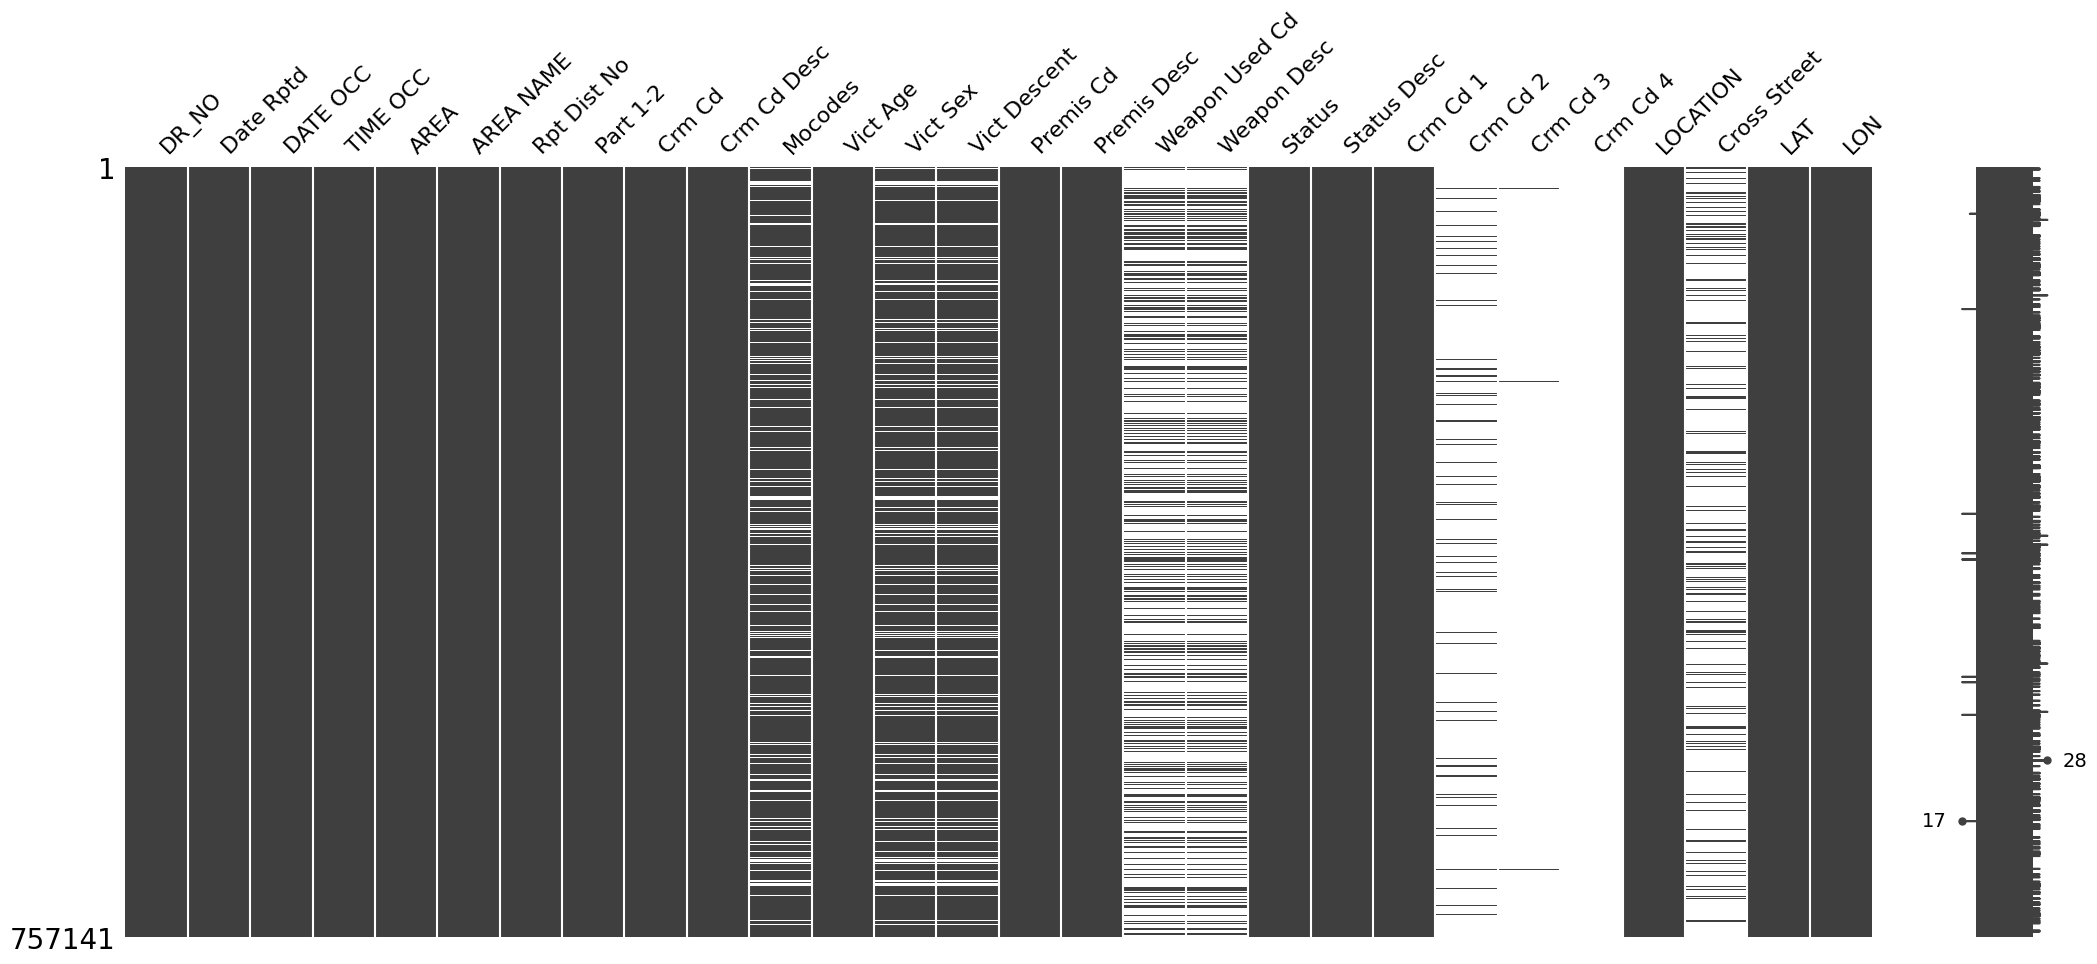

In [ ]:
# checking for missing values
import missingno as msno
msno.matrix(crimes);

In [ ]:
# sb.set_palette('Set3')
# sb.color_palette("pastel")
# plt.rcParams['figure.figsize']=10,6

In [ ]:
print(crimes.shape, "\n")
print(crimes.dtypes)

### **Data cleaning**

In [ ]:
#Convert Type
crimes['DATE OCC'] = pd.to_datetime(crimes['DATE OCC'])

# Drop duplicate rows
crimes.drop_duplicates(inplace=True)

# delete all rows with column 'Vict_Age' has value less than 0 or equal to 120
indexAge = crimes[(crimes['Vict Age'] < 0) | (crimes['Vict Age'] >= 120) ].index
crimes.drop(indexAge,axis=0,inplace=True)

# delete all rows with column 'LON' has value 0
indexAge = crimes[crimes[('LON')]==0].index
crimes.drop(indexAge,axis=0,inplace=True)

#Drop Unnecessary Columns
crimes.drop(['DR_NO','Date Rptd','Rpt Dist No','Part 1-2','Mocodes','Crm Cd 1','Crm Cd 2','Crm Cd 3','Crm Cd 4','Status','LOCATION','Cross Street'],axis =1,inplace = True)

#Rename columns
crimes.rename(columns = {'DATE OCC':'Date_Occ','TIME OCC':'Time_Occ','AREA NAME':'Area_Name','AREA':'Area',
                          'Crm Cd':'Crm_Cd','Crm Cd Desc':'Crm_Cd_Desc','Vict Age':'Vict_Age',
                            'Vict Sex':'Vict_Sex','Vict Descent':'Vict_Descent','Premis Cd':'Premis_Cd','Premis Desc':'Premis_Desc',
                              'Weapon Used Cd':'Weapon_Used_Cd','Weapon Desc':'Weapon_Desc','Status Desc':'Status_Desc' },inplace = True)

In [ ]:
crimes['Year'] = pd.DatetimeIndex(crimes['Date_Occ']).year

In [ ]:
df_child = crimes.loc[(crimes['Crm_Cd_Desc'].str.contains("CHILD"))]
df_child = df_child.groupby(by=['Area','Year']).count().reset_index().iloc[:,[0,1,2]]

In [ ]:
df_child.rename(columns = {'Date_Occ':'No_Of_Crimes' },inplace = True)
df_child.drop(df_child[df_child['Year'] == 2023].index, inplace = True)

In [ ]:
df_child = df_child.set_index('Area')

In [ ]:
df_child = pd.merge(df_child, population, left_index=True, right_index=True, how = 'left')
df_child['Population']=df_child['Population'].str.replace(',','')
df_child['Population'] = df_child['Population'].astype('int')

In [ ]:
df_child['rate_per_pop'] = ((df_child['No_Of_Crimes'] / df_child['Population'])*1000)

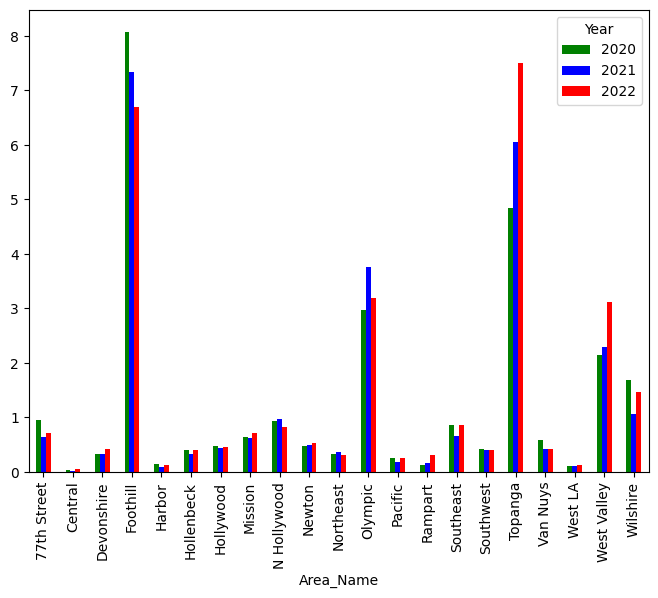

In [ ]:
df_child.pivot_table('rate_per_pop', ['Area_Name'], 'Year').plot(kind = "bar",color=["g","b","r"], figsize=(8, 6));

In [ ]:
df_violent_crimes = crimes.loc[(crimes['Crm_Cd'] <= 330)]

In [ ]:
df_violent_crimes = df_violent_crimes.groupby(by=['Area','Year']).count().reset_index().iloc[:,[0,1,2]]

In [ ]:
df_violent_crimes.rename(columns = {'Date_Occ':'No_Of_Crimes' },inplace = True)
df_violent_crimes.drop(df_violent_crimes[df_violent_crimes['Year'] == 2023].index, inplace = True)

In [ ]:
df_violent_crimes = df_violent_crimes.set_index('Area')

In [ ]:
df_violent_crimes = pd.merge(df_violent_crimes, population, left_index=True, right_index=True, how = 'left')
df_violent_crimes['Population']=df_violent_crimes['Population'].str.replace(',','')
df_violent_crimes['Population'] = df_violent_crimes['Population'].astype('int')

In [ ]:
df_violent_crimes['rate_per_pop'] = ((df_violent_crimes['No_Of_Crimes'] / df_violent_crimes['Population'])*1000)

<Axes: xlabel='Area_Name'>

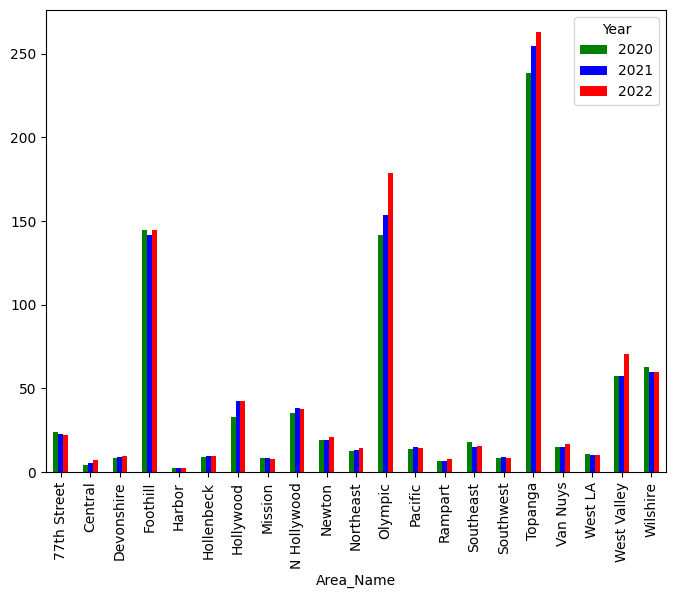

In [ ]:
df_violent_crimes.pivot_table('rate_per_pop', ['Area_Name'], 'Year').plot(kind = "bar",color=["g","b","r"], figsize=(8, 6))

In [ ]:
rate_per_month=crimes.groupby(
  [
    crimes['Area'],
    crimes['Date_Occ'].dt.year,
    crimes['Date_Occ'].dt.month
  ]
).agg(
    {
         'Crm_Cd':sum,    # Sum crimes code
         'Area': "count"  # count number of crimes
    }
)

In [ ]:
rate_per_month.index = rate_per_month.index.set_names(['Area_Code', 'Year','Month'])
rate_per_month.reset_index(inplace=True)
rate_per_month = pd.merge(rate_per_month, population, left_on = 'Area_Code', right_index=True, how = 'left')
rate_per_month['Population']=rate_per_month['Population'].str.replace(',','')
rate_per_month['Population'] = rate_per_month['Population'].astype('int')

In [ ]:
rate_per_month['rate'] = (rate_per_month['Crm_Cd'] / rate_per_month['Population'])
rate_per_month['mean'] = (rate_per_month['Crm_Cd'] / rate_per_month['Area'])

In [ ]:
rate_per_month['date'] = pd.to_datetime(dict(year=rate_per_month.Year, month=rate_per_month.Month, day="1"))
rate_per_month.drop(rate_per_month[(rate_per_month['Year'] == 2023) & (rate_per_month['Month'] == 7)].index, inplace = True)
rate_per_month.rename(columns = {'Area':'No_Of_Crimes' },inplace = True)
rate_per_month = rate_per_month[['Area_Code', 'Year', 'Month', 'date', 'Crm_Cd', 'No_Of_Crimes', 'Area_Name', 'Population', 'rate', 'mean']]

In [ ]:
rate_per_month['rate_per_pop'] = ((rate_per_month['No_Of_Crimes'] / rate_per_month['Population'])*1000)

In [ ]:
rate_per_month.head()

,Area_Code,Year,Month,date,Crm_Cd,No_Of_Crimes,Area_Name,Population,rate,mean,rate_per_pop
0,1,2020,1,2020-01-01,616957,1204,Central,827009,0.746010,512.422757,1.455849
1,1,2020,2,2020-02-01,578438,1127,Central,827009,0.699434,513.254658,1.362742
2,1,2020,3,2020-03-01,489870,966,Central,827009,0.592339,507.111801,1.168065
3,1,2020,4,2020-04-01,404941,796,Central,827009,0.489645,508.719849,0.962505
4,1,2020,5,2020-05-01,527215,1059,Central,827009,0.637496,497.842304,1.280518


<Axes: xlabel='date'>

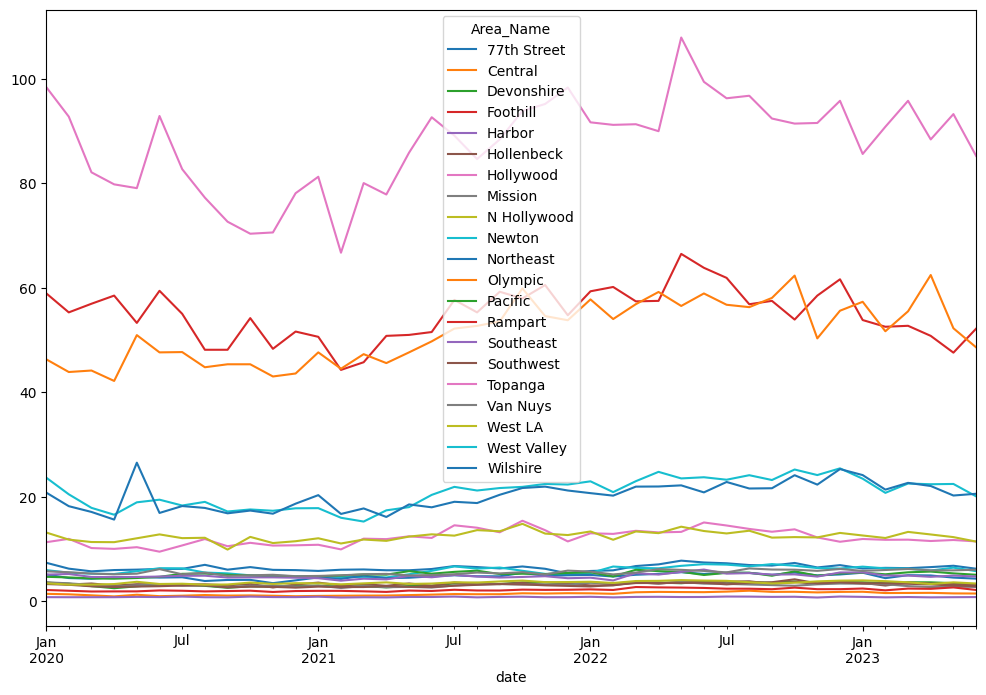

In [ ]:
rate_per_month.pivot_table('rate_per_pop', ['date'], 'Area_Name').plot(figsize=(12, 8))#subplots=True)#,stacked = True,color=["#1f77b4","#17becf","#ff9896"], figsize=(12, 8))#, rot=45)

<Axes: xlabel='date'>

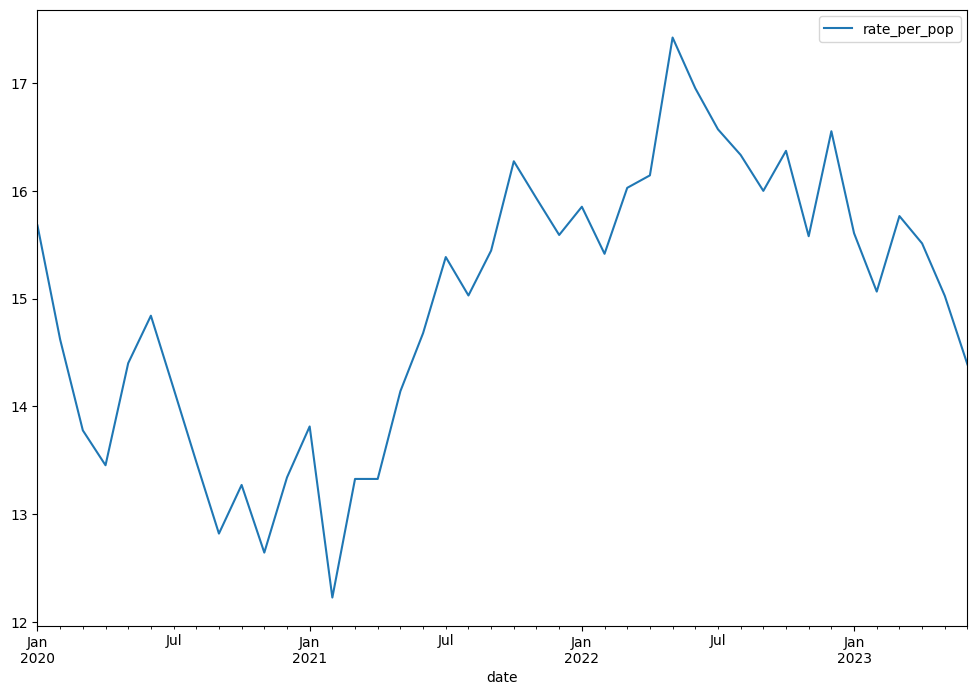

In [ ]:
rate_per_month.pivot_table('rate_per_pop', ['date']).plot(figsize=(12, 8))#subplots=True)#,stacked = True,color=["#1f77b4","#17becf","#ff9896"], figsize=(12, 8))#, rot=45)

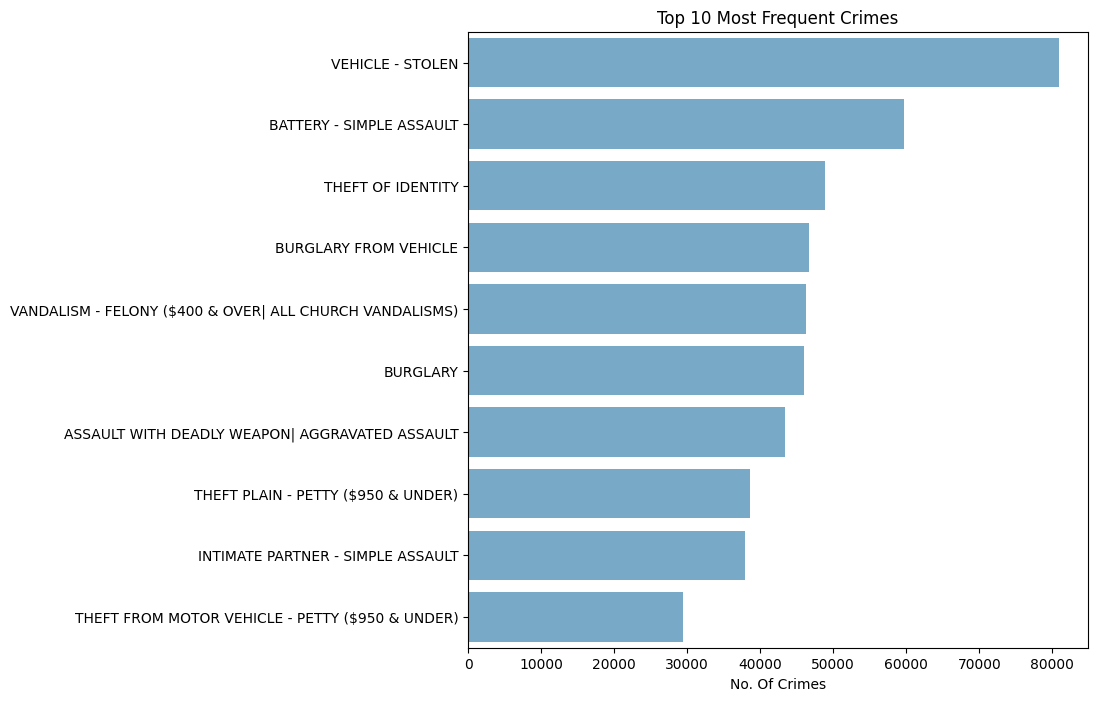

In [ ]:
# Count the occurrences of each crime type (Crm Cd Desc)
crime_counts = crimes['Crm_Cd_Desc'].value_counts()

# Plot the top 10 most frequent crimes
plt.figure(figsize=(8, 8))
blue_shade = sb.color_palette("Blues", n_colors=1)[0]
sb.barplot(x=crime_counts.head(10).values, y=crime_counts.head(10).index,color=blue_shade)
plt.xlabel('No. Of Crimes')
plt.title('Top 10 Most Frequent Crimes')
plt.show()


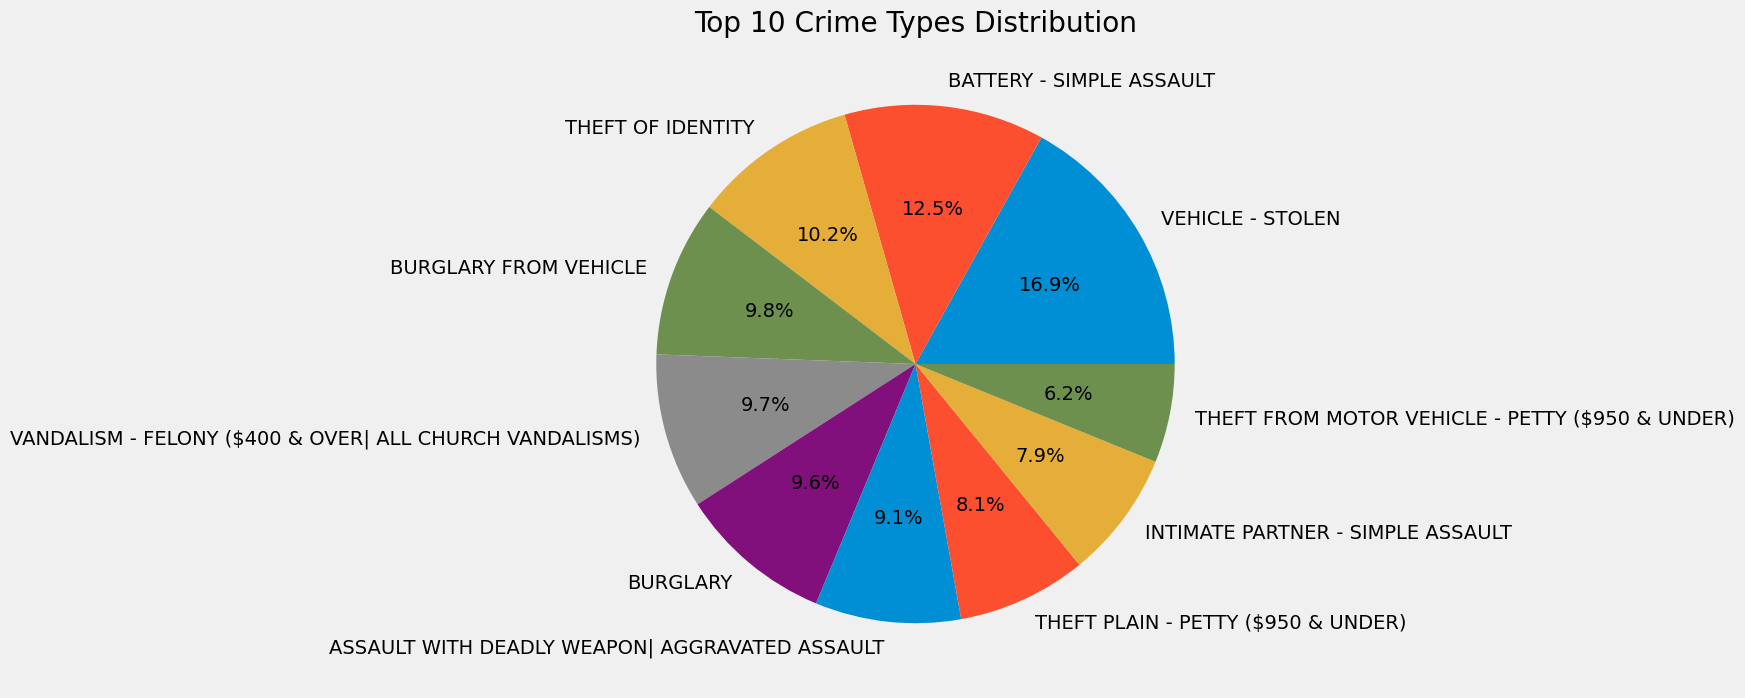

In [ ]:
# Crime Type Distribution - Pie Chart
crime_type_counts = crimes['Crm_Cd_Desc'].value_counts()
top_10_crime_types = crime_type_counts.head(10)

plt.figure(figsize=(8, 8))
plt.pie(top_10_crime_types, labels=top_10_crime_types.index, autopct='%1.1f%%')
plt.title('Top 10 Crime Types Distribution')
plt.plot(kind = "bar",color=["g","b","r"], figsize=(8, 6))
# plt.show()

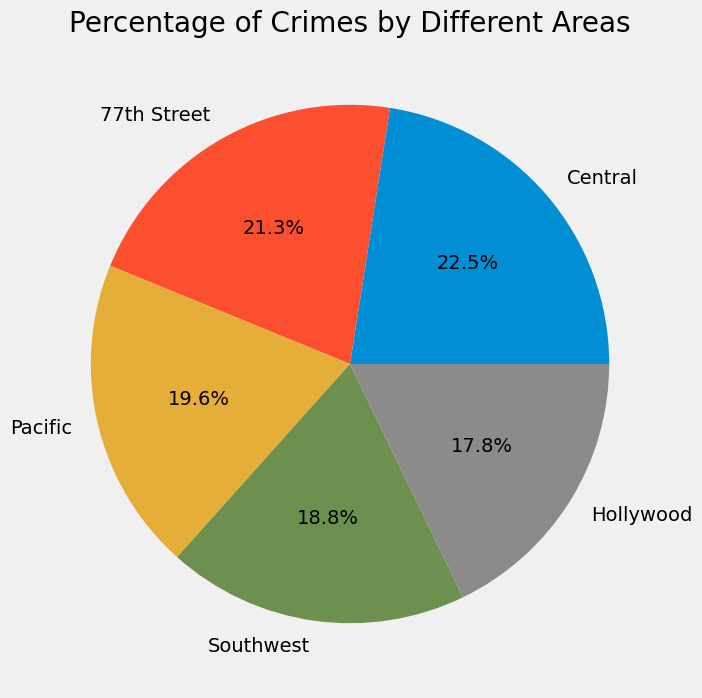

In [ ]:
# Crimes by Different Areas - Pie Chart
crime_area_counts = crimes['Area_Name'].value_counts().head(5)

plt.figure(figsize=(8, 8))
plt.pie(crime_area_counts, labels=crime_area_counts.index, autopct='%1.1f%%')
plt.title('Percentage of Crimes by Different Areas')
plt.show()

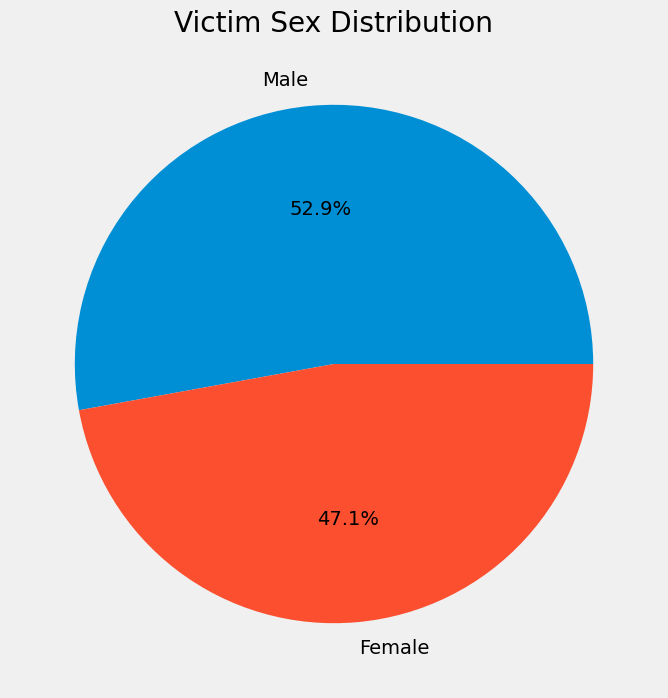

In [ ]:
#  Victim Sex Distribution - Pie Chart
victim_sex_counts = crimes['Vict_Sex'].value_counts().head(2)
victim_sex_counts.rename({'M': 'Male', 'F': 'Female'}, inplace = True)
plt.figure(figsize=(8, 8))
plt.pie(victim_sex_counts, labels=victim_sex_counts.index, autopct='%1.1f%%')
plt.title('Victim Sex Distribution')
plt.show()

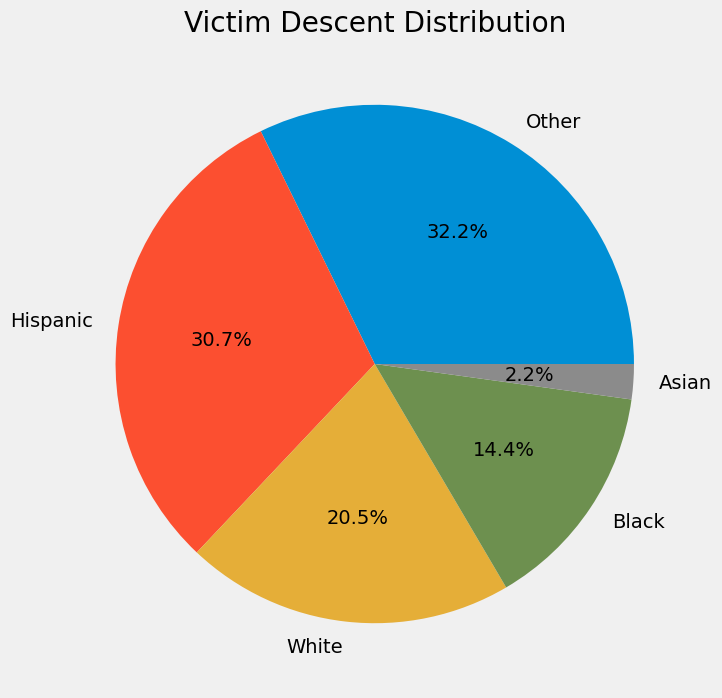

In [ ]:
# Victim Descent Distribution - Pie Chart
victim_descent_counts = crimes['Vict_Descent'].copy(deep=True)

victim_descent_counts = victim_descent_counts.apply(func=lambda x: x if x in {'A', 'B', 'H', 'W'} else
                                                  'Other').replace({'A': 'Asian', 'B': 'Black', 'H': 'Hispanic', 'W': 'White'})
victim_descent_counts = victim_descent_counts.value_counts()
#victim_descent_counts

plt.figure(figsize=(8, 8))
plt.pie(victim_descent_counts, labels=victim_descent_counts.index, autopct='%1.1f%%')
plt.title('Victim Descent Distribution')
plt.show()

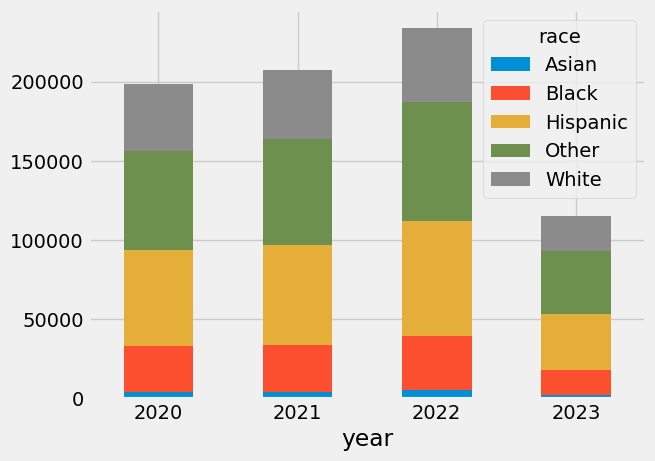

In [ ]:
# Victim Descent Distribution - Bar Chart

race_per_year = crimes[['Date_Occ', 'Vict_Descent']].copy(deep=True)
race_per_year['year'] = race_per_year['Date_Occ'].dt.year
race_per_year = race_per_year.drop(columns=['Date_Occ']).rename(columns={'Vict_Descent': 'race'})
race_per_year['race'] = race_per_year['race'].apply(func=lambda x: x if x in {'A', 'B', 'H', 'W'} else
                                                  'Other').replace({'A': 'Asian', 'B': 'Black', 'H': 'Hispanic', 'W': 'White'})
race_per_year.groupby(['year', 'race']).size().unstack().plot(kind='bar', stacked=True, rot=0);

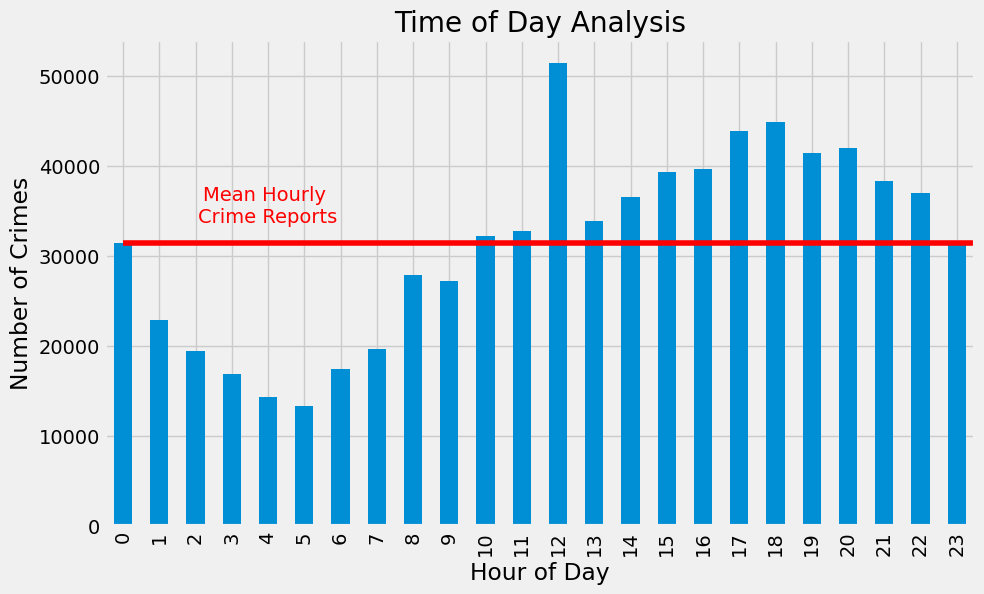

In [ ]:
# Time of Day Analysis

crimes['Hour'] = crimes['Time_Occ'] // 100
crime_time_of_day_counts = crimes['Hour'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.hlines(crime_time_of_day_counts.mean(),0,24,color="red")
plt.text(4,35500,"Mean Hourly \nCrime Reports",color ="red", horizontalalignment = "center", verticalalignment = "center")
crime_time_of_day_counts.plot(kind='bar')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crimes')
plt.title('Time of Day Analysis')
plt.show()


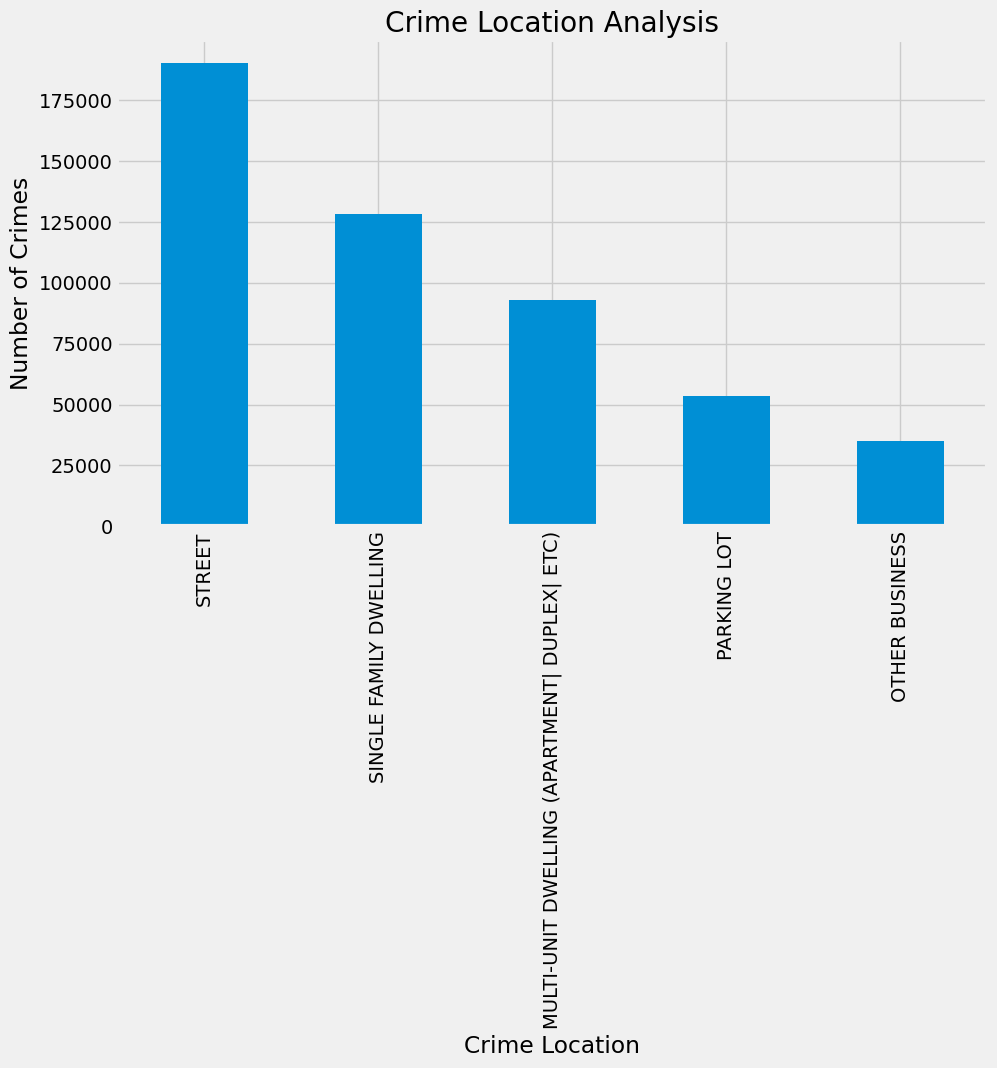

In [ ]:
# Crime Location Analysis

crime_location_counts = crimes['Premis_Desc'].value_counts().head(5)
plt.figure(figsize=(10, 6))
crime_location_counts.plot(kind='bar')
plt.xlabel('Crime Location')
plt.ylabel('Number of Crimes')
plt.title('Crime Location Analysis')
plt.show()

In [ ]:
from folium import Icon
from folium import Map
from folium import Marker

sample_size = 500

# we have a limited color map so we loop it to pad it out
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue', 'darkpurple',
          'white', 'pink', 'lightblue', 'lightgreen', 'gray', 'black', 'lightgray'] * 7
code_color_map = dict(zip(tuple(crimes['Crm_Cd'].unique()), tuple(colors)))

# for some reason we have to fudge the center a little
lon_fudge = -0.5
location_map = Map(location=[crimes['LAT'].mean(), crimes['LON'].mean() + lon_fudge], zoom_start=10)
for index, row in crimes.sample(sample_size).iterrows():
    #popup = '{}/{}/{}:{}'.format(row['LOCATION'], row['AREA NAME'], row['Crm Cd Desc'], row['Status'])
    Marker([row['LAT'], row['LON']], icon=Icon(color=code_color_map[row['Crm_Cd']])).add_to(parent=location_map)

location_map



In [ ]:
# import folium
# from folium.plugins import HeatMap

# # Assuming you have already loaded the 'crime' DataFrame with the relevant data
# # Replace 'crime' with your actual DataFrame name

# # Drop rows with missing latitude and longitude values
# crime_with_location = crimes.dropna(subset=['LAT', 'LON'])

# # Prepare data for the heatmap
# heat_data = [[row['LAT'], row['LON']] for index, row in crime_with_location.iterrows()]

# # Create a map centered on Los Angeles
# map_LA = folium.Map(location=[34.0522, -118.2437], zoom_start=11)

# # Add the heatmap layer to the map
# HeatMap(heat_data).add_to(map_LA)

# # Display the map
# map_LA

In [ ]:
# import folium

# # Create a map centered at a specific location (e.g., Los Angeles)
# crime_map = folium.Map(location=[34.0522, -118.2437], zoom_start=12)
# crimes_test = crimes.head(100)
# # Add crime locations as markers on the map
# for index, row in crimes_test.iterrows():
#     folium.Marker(location=[row['LAT'], row['LON']], popup=row['Crm_Cd_Desc']).add_to(crime_map)

# # Display the map
# crime_map